### PythonID Semarang
# Project: Predicting Boston Housing Prices

## Getting Started
Pada project ini, kita belajar untuk mengevaluasi performa dan melakukan prediksi dari model yang sudah dilatih dan diuji pada data *housing* di Boston, Massachusetts. Model prediksi bisa digunakan oleh real estate agent.


Dataset asli diambil dari [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/housing). Data Boston housing dikumpulkan pada tahun 1978, terdapat 506 entries dengan 14 features. Untuk mempermudah project ini, berikut beberapa langkah *preprocessing data* yang telah dilakukan:
- 16 data pada `'MEDV'` memiliki nilai 50.0. Data ini sepertinya terdapat **missing/censored values** dan telah dihapus.
- 1 data pada `'RM'` memiliki nilai 8.78. Data ini tergolong **outlier** dan telah dihapus.
- Fitur yang digunakan `'RM'`, `'LSTAT'`, `'PTRATIO'`, dan `'MEDV'`. Yang lainnya **non-relevant features** tidak dimasukkan.
- Fitur `'MEDV'` dilakukan **multipicatively scaled** untuk menghitung market inflation selama 35 tahun ke depan.

In [1]:
# import libraries
import numpy as np
import pandas as pd

# tambahan dari visual.py untuk visualisasi data
import visuals as vs

In [2]:
# load dataset
data = pd.read_csv('housing.csv')

In [3]:
data.shape

(489, 4)

In [4]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


## Data Exploration
Berikut adalah **features** yang ada pada data housing:
- **RM**: Rata-rata jumlah kamar untuk tiap tempat tinggal
- **LSTAT**: % lower status dari populasi
- **PTRATIO**: pupil-teacher rasio tiap kota
- **MEDV**: median value dari rumah pemilik dalam \$1000


Tujuan dari project ini adalah membuat sebuah model yang mampu melakukan prediksi harga rumah, sehingga kita perlu memisah dataset menjadi **faetures** dan **target variable**. 
- **Features**-nya adalah `'RM'`, `'LSTAT'`, dan `'PTRATIO'`
- **Target variable**-nya adalah `'MEDV'`

In [5]:
prices = data['MEDV']
features = data.drop('MEDV', axis=1)

In [6]:
features.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [7]:
prices.head()

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64

### Implementation: Calculate Statistics
Kita akan menghitung descriptive statistics dari data Boston housing prices menggunakan `'numpy'`. Hasil perhitungan akan sangat berguna untuk menganalisa beragam hasil prediksi dari model.

In [8]:
# Minimum price of the data
minimum_price = np.min(prices)

# Maximum price of the data
maximum_price = np.max(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print ("Statistics for Boston housing dataset:")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))

Statistics for Boston housing dataset:
Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00


### Feature Observation
Menggunakan intuisi, untuk setiap feature `'RM'`, `'LSTAT'`, `'PTRATIO'`, bagaimana pengaruhnya pada `'MEDV'`? Apakah naik atau turun?

Hipotesis:
1. Pengaruh `'RM'` meningkat, `'MEDV'` naik
2. Pengaruh `'LSTAT'` meningkat, `'MEDV'` turun
3. Pengaruh `'PTRATIO'` meningkat, `'MEDV'` relatif turun

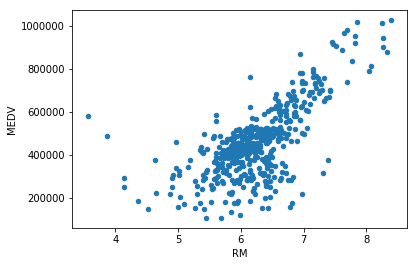

In [9]:
# visualize the data
data[['RM', 'MEDV']].plot.scatter(x='RM', y='MEDV')

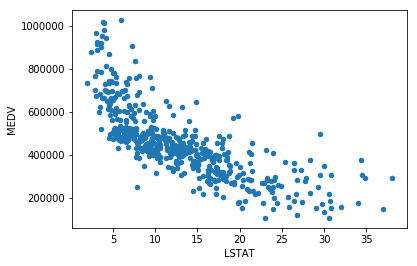

In [10]:
data[['LSTAT', 'MEDV']].plot.scatter(x='LSTAT', y='MEDV')

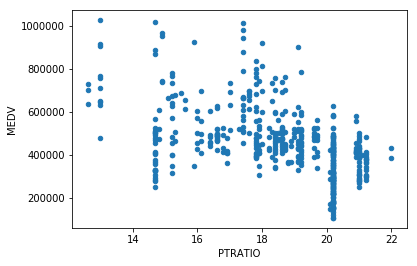

In [11]:
data[['PTRATIO', 'MEDV']].plot.scatter(x='PTRATIO', y='MEDV')

In [12]:
prices.describe()

count    4.890000e+02
mean     4.543429e+05
std      1.653403e+05
min      1.050000e+05
25%      3.507000e+05
50%      4.389000e+05
75%      5.187000e+05
max      1.024800e+06
Name: MEDV, dtype: float64

## Developing a Model
### Define a Performance Metric
Pada project ini menggunakan [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, untuk menghitung performa model. *Coefficient of determination* sangat berguna pada regresi. 


Nilai dari R<sup>2</sup> memiliki range 0 sampai 1. Model dengan R<sup>2</sup> yang bernilai 0 tidak lebih baik dari model yang selalu prediksi *mean* dari **target variable**, sedangka model dengan R<sup>2</sup> bernilai 1 melakukan prediksi secara sempurna. _Model juga bisa memberikan nilai R<sup>2</sup> negatif, yang mengindikasi model buruk dari yang selalu prediksi dengan rata-rata dari target variable._

In [13]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Goodness of Fit
Asumsi memiliki 5 data dan hasil prediksi dari model:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Bagaimana performa model? Kita coba gunakan fungsi `performance_metric` untuk mengetahuinya.

In [14]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


### Shuffle and Split Data
Berikutnya kita akan membagi dataset menjadi `training` set dan `testing` set. Untuk membaginya kita juga harus acak untuk menghindari bias.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    train_size=0.8, test_size=0.2,
                                                    random_state=20)

In [16]:
print("Training set = ", len(X_train),"|" ,"Testing set = ", len(X_test))

Training set =  391 | Testing set =  98


### Training and Testing
Apakah manfaatnya membagi dataset menjadi `training` dan `testing`?

## Analyzing Model Performance
### Learning Curves
Coba perhatikan graph berikut.

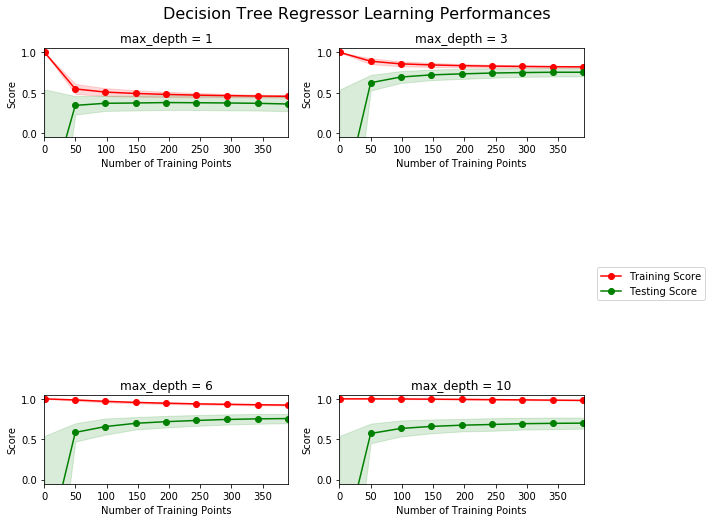

In [17]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

Berdasarkan graph di atas, mana model yang terbaik?

### Complexity Curves
Graph menampilkan model Decision Tree dengan `max_depth` berbeda.

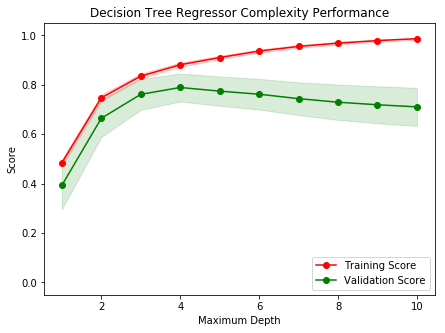

In [18]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff
Apa yang terjadi ketika `max_depth` bernilai 1 dan 10?

### Best-Guess Optimal Model
Yang mana?

## Evaluating Model Performance

### Grid Search dan Cross Validation

In [19]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

## Making Predictions
### Optimal Model

In [20]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


### Predicting Selling Prices
Misalkan terdapat informasi dari 3 client seperti berikut

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

Predicted selling price for Client 1's home: $306,337.50
Predicted selling price for Client 2's home: $224,342.55
Predicted selling price for Client 3's home: $930,490.91


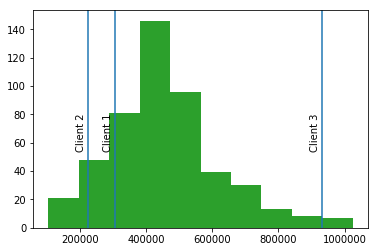

In [21]:
import matplotlib.pyplot as plt

# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    plt.hist(prices)
    plt.axvline(price)
    plt.text(price-35000, 75, 'Client '+str(i+1), rotation=90)
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

### Sensitivity
Model yang optimal belum tentu robust. Terkadang, model terlalu complex atau terlalu simple untuk menggeneralisasi data. Bisa juga model menggunakan *learning algorithm* yang tidak sesuai dengan data. Atau bisa juga, data terdapat banyak *noisy* atau terlalu sedikit.

Coba jalankan `fit_model` sebanyak 10 kali dengan training dan testing set berbeda untuk melihat prediksi pada client spesifik.

In [22]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $29,438.89


## Applicable?